# Capstone Project 2 - Milestone Report #

~Sneha Krishnamurthy

## Sentiment Analysis of Twitter data: Is Electoral College in U.S. worth keeping? ##

__Abstract__

The goal of this project is to predict Twitter users’ political sentiment about electoral college in U.S. for the given Twitter post using Python based Machine learning NLP Classification model. Many Americans are critical of the Electoral College, an attitude that seems to have intensified since Donald Trump defeated Hillary Clinton in the 2016 presidential election despite losing the popular vote. This project explores on predicting how positive, neutral or negative each tweet is about electoral college. What is being said about Electoral College on social media? How has the sentiment changed over the years? We also want to understand the overall feelings towards Democrats and Republicans when it comes to the topic of electoral college.

 The data used for this model is obtained by using Tweepy to scrape Twitter API for data collection using the keyword “electoral college”. The first step in building the model is cleaning the data obtained and analyzing the data by applying EDA techniques using Python and other libraries such as the natural language toolkit (nltk), gensim, scikit-learn and spaCy.



__Problem:__
This project explores on predicting how positive, neutral or negative each tweet is about electoral college. 

__Clients:__

This Sentiment Analysis model can be used by election campaign officials, election committees  and also the general public to  learn about the public sentiment towards electoral college.  This study seeks to display helpful information about electoral college that  even the candidates may consider in future while on the campaign trail. 

__Data:__

This project uses Tweepy to access Twitter API for data collection using the keyword “electoral college”. 
After dropping columns such as twitter handle and usernames, to comply with Twitter API policy, we were left with 47182 rows and 13 columns in the dataframe. 
 The columns that are included are 'User_Id', 'Total Tweets', 'Favourites_Count', 'Followers',        'User_Verified', 'User Location', 'Date of Tweet', 'Tweet Id',  'Tweet Text', 'Language', 'Tweet Source',  ‘Tweet Retweet',   'Tweet Reply To Id'

After basic cleaning of data extracted from the Twitter API, we generated a sentiment score  for each tweet, which would be our target variable as explained in this [link](https://github.com/aspiringdatascientist/Capstone2-Sentiment-Analysis-of-Twitter-data/blob/master/label_tweets.ipynb). 




__Data Exploration:__

Let's load our data and explore the first few rows:

In [1]:

#import the necessary modules
import pandas as pd
import numpy as np
import spacy
# Importing stop words from NLTK corpus for english language
from nltk.corpus import stopwords
# Importing word tokenizer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

# Load the en_core_web_sm model
nlp = spacy.load('en_core_web_sm')
pd.set_option('display.max_colwidth', -1)
import matplotlib.pyplot as plt

In [2]:
# import the csv file as Pandas dataframe
df = pd.read_csv('tweets5.csv',encoding = "latin1")

In [3]:
#shape of DataFrame
df.shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in the dataframe")

There are 47181 rows and 13 columns in the dataframe


In [4]:
#display the first few rows of the dataframe
df.head(3)

,User_Id,Total Tweets,Favourites_Count,Followers,User_Verified,User Location,Date of Tweet,Tweet Id,Tweet Text,Language,Tweet Source,Tweet Retweet,Tweet Reply To Id
0,b'1658338609',b'313',b'657',b'80',b'False',b'',b'2013-08-09 18:06:33',b'1194457803089276928',b'RT @MrDuganDVOLP: Worked with Lila and Nate today at BGHS Online Lab. Great conversations regarding Electoral College and life after high\xe2\x80\xa6',b'en',b'Twitter for Android',b'2',b'None'
1,b'185949950',b'10396',b'11498',b'271',b'False',b'',b'2010-09-02 06:23:41',b'1194457753256775686',"b'@verrierf @TMZ We did vote, if you recall Hillary won the popular vote by over 3 million votes. https://t.co/n7UDt1FuYz'",b'en',b'Twitter for iPhone',b'0',b'149924374'
2,b'3809154554',b'10916',b'11841',b'2101',b'False',"b'Burbank, CA'",b'2015-10-07 01:32:48',b'1194457695308222464',b'@MaddowBlog @MSNBC If anything the circus about the impeachment comes 2 late that guy and his fascist minions have destroyed the USA thx to the ABBERANTLY RIDICULOUSLY STUPIDLY REDUNDANT OBSOLETE ELECTORAL COLLEGE and z APATHY of 108 millions of eligible voters that didnt vote in 2016',b'en',b'Twitter for Android',b'0',b'91180720'


As we can see, we have to remove 'b' prefix which is a decoded string in Python to stop it from interfering in future coding.


__Data Cleaning:__

First,let's remove prefix 'b' and apply it to all values in the Dataframe

In [40]:
#remove prefix 'b
df = df.applymap(lambda x: str(x)[1:])
df['Tweet Text'][4]

"'We\\xe2\\x80\\x99re still skewed by population but not quite near as much. TGI Electoral College... \\n#ElectionResults2019\\xe2\\x80\\xa6 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr'"

In [41]:
# Let's print 2 tweets where we can see strange patterns of characters "\xe2\x80\x99" which are UTF-8 BOM and &amp and also prefix 'b'.
print(df['Tweet Text'][4])
print(df['Tweet Text'][24])

'We\xe2\x80\x99re still skewed by population but not quite near as much. TGI Electoral College... \n#ElectionResults2019\xe2\x80\xa6 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr'
'RT @lessgallon: @WalterJ02130480 @AnnCoulter No love, he \xe2\x80\x9cwon\xe2\x80\x9d because of the electoral college &amp; millions of scared white people which is quite sad considering the compromise helped bring about the Electoral College in the first place.'



The hexadecimal representation \xe2\x80\x99 of the Unicode character U+2019 is actually the right single quotation mark. We also  see strange patterns of characters "\xe2\x80\xa6" which are UTF-8 BOM (Byte Order Mark)."The UTF-8 BOM is a sequence of bytes that allows the reader to identify a file as being encoded in UTF-8."

URL links, @ symbols  and hashtags need to be included in character count and will be preprocessed later. It looks like HTML encoding has not been converted to text as can be seen in example #2, and ended up in text field as '&amp','&quot',etc. Decoding HTML to general text will be my next step of data preparation. I will use BeautifulSoup for this.


Tokenization, stemming,lemmatization, stop words removal will be dealt with at a later stage when creating matrix with either count vectorizer or Tfidf vectorizer. Let us perform basic data cleaning steps  first as mentioned above to remove strange patterns of characters: 

In [42]:
#create new column "full_text" after data cleaning
df['Tweet Text']= df['Tweet Text'].map(lambda x: x.encode().decode("utf-8", 'replace')) 


import re
import string
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')
for i in range(len(df["Tweet Text"])):
    
    txt = df.loc[i]["Tweet Text"]
    txt=  txt.strip()##replace  white spaces
    txt =re.sub(r'[\r|\n|\r\n]+', '\n', txt)  # removing extra lines. 
    txt = re.sub(r'(\\x(.){2})', '',txt)#remove extra UTF BOM characters
    #txt = re.sub(r"\r?\n?$", "", txt)  ##replace new line characters 
    txt = ' '.join(txt.split()) ##replace new line characters
    
    soup = BeautifulSoup(txt, 'lxml')
    souped_text = soup.get_text()
    souped_text= souped_text.lstrip("\'") #only remove quotes occuring at the start of the string
    souped_text = souped_text.rstrip("\'")# only remove quotes occuring at the end of the string
    souped_text =" ".join(souped_text.split())
    
    df.at[i,"full_text"] = souped_text


In [43]:

#Next, let's remove  retweets tag representeed "RT" and apply it to all values in the Dataframe
df['full_text'] = df['full_text'].str.replace("RT", "", case = False)

#remove whitespaces
df['full_text'] = df['full_text'].apply(lambda row: " ".join(row.split())) 

#remove new line characters
df['full_text']= df['full_text'].map(lambda x: x.replace("\\n",""))

#remove new line characters
df['full_text']= df['full_text'].map(lambda x: x.replace("\\",""))


#Let's compare original tweets with cleaned tweets
df[['Tweet Text','full_text']][0:5]

,Tweet Text,full_text
0,'RT @MrDuganDVOLP: Worked with Lila and Nate today at BGHS Online Lab. Great conversations regarding Electoral College and life after high\xe2\x80\xa6',@MrDuganDVOLP: Worked with Lila and Nate today at BGHS Online Lab. Great conversations regarding Electoral College and life after high
1,"'@verrierf @TMZ We did vote, if you recall Hillary won the popular vote by over 3 million votes. https://t.co/n7UDt1FuYz'","@verrierf @TMZ We did vote, if you recall Hillary won the popular vote by over 3 million votes. https://t.co/n7UDt1FuYz"
2,'@MaddowBlog @MSNBC If anything the circus about the impeachment comes 2 late that guy and his fascist minions have destroyed the USA thx to the ABBERANTLY RIDICULOUSLY STUPIDLY REDUNDANT OBSOLETE ELECTORAL COLLEGE and z APATHY of 108 millions of eligible voters that didnt vote in 2016',@MaddowBlog @MSNBC If anything the circus about the impeachment comes 2 late that guy and his fascist minions have destroyed the USA thx to the ABBERANTLY RIDICULOUSLY STUPIDLY REDUNDANT OBSOLETE ELECTORAL COLLEGE and z APATHY of 108 millions of eligible voters that didnt vote in 2016
3,'The Democratic nominee against Trump could beat him by far more votes than Hillary Clinton did in 2016 \xe2\x80\x94 and still lose\xe2\x80\xa6 https://t.co/RKPLB4tzoT',The Democratic nominee against Trump could beat him by far more votes than Hillary Clinton did in 2016 and still lose https://t.co/RKPLB4tzoT
4,'We\xe2\x80\x99re still skewed by population but not quite near as much. TGI Electoral College... \n#ElectionResults2019\xe2\x80\xa6 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr',Were still skewed by population but not quite near as much. TGI Electoral College... #ElectionResults2019 #ElectionResults2019 #ElectoralCollege #Election2020 #YangGang #FeelTheBern #TrumpTrain https://t.co/5ilhukuqnr


In [44]:
 #Let's look at the  cleaned text column


df['full_text'][7:10]

7    @TheAtlantic @YAppelbaum So it's Trump to blame for "radicalizing the Left"? Isn't it the Left who refuses to accep the 2016 election results, who want to pack SCOTUS, eliminate the Electoral College, abolish the Senate, and stop enforcing the border? And Trump the extremist? #Trump2020 https://t.co/eyDpBsjvJE
8    @blackwomenviews: Funny how Republicans like Nikki Haley suddenly have all this energy for letting the people decide Trump's fate when                                                                                                                                                                                 
9    @RapUp @people Is this the Electoral College vote                                                                                                                                                                                                                                                                      
Name: full_text, dtype: object

__Exploratory Data Analysis__

After performing basic data cleaning, let's explore the average character count of the tweets in our dataset.As far as Twitter is concerned, every single character in a Tweet counts as one for the purposes of the character count which includes  letters, numbers, spaces,letters with accent marks,  mentions,hashtags and other symbols.There is only one exception to this rule which is that Twitter uses its own URL shortening service, any website address you post in a tweet will count as 22 characters, regardless of whether it originally was longer or shorter than that.  

In [45]:
#Let's copy df as "tweets" df
tweets = df.copy()

In [46]:
# Create a feature char_count
tweets['character_length'] = tweets['full_text'].apply(len)

# Print the average character count
print(tweets['character_length'].mean())

127.90224878658782


Notice that the average character count of these tweets is approximately 128, which is well within the limit of overall average tweet length of around 140 characters. Even extremely basic features such as character counts can prove to be very useful to find outliers. Looks like we do not need to worry about that for now since the character length is well within the limit. In November 2017, Twitter doubled the available character space from 140 to 280 characters. Let's find the character length count segregated by years.

In [47]:
# Convert the 'Date of Tweet' column to datetime object
tweets['Date of Tweet'] = pd.to_datetime(tweets['Date of Tweet'])

#Create year column

tweets["year"] = tweets['Date of Tweet'].dt.year

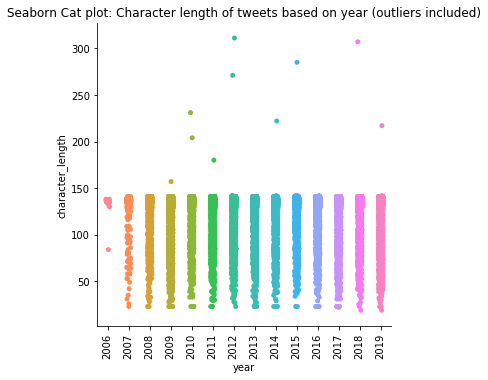

In [48]:
import seaborn as sns

sns.catplot(x = "year", y="character_length",  data= tweets);
plt.title("Seaborn Cat plot: Character length of tweets based on year (outliers included)")
plt.xticks(rotation=90);

In November 2017, Twitter doubled the available character space from 140 to 280 characters.  Let's remove the outliers.

In [49]:
#Removing outliers

tweets = tweets[tweets['character_length'] <= 280]
tweets = tweets[(tweets['character_length'] <= 140) & (tweets['year'] <= 2017) ]


In [50]:
print(f"The number of rows before removing outliers are {df.shape[0]} and after removing outliers, it is {tweets.shape[0]}")

The number of rows before removing outliers are 47181 and after removing outliers, it is 37721


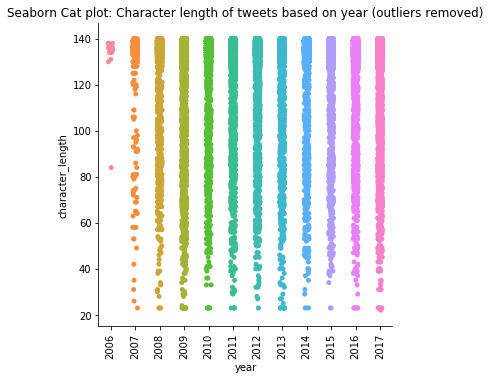

In [51]:
sns.catplot(x = "year", y="character_length",  data= tweets);
plt.title("Seaborn Cat plot: Character length of tweets based on year (outliers removed)")
plt.xticks(rotation=90);

Looks like Twitter’s doubling of character count from 140 to 280 had little impact on length of tweets.

Next, let's define a function to find out if we have any emojis in our data

In [52]:
#import required packages
import regex
import emoji

def emoticon(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)
    
    return''.join(emoji_list)

In [53]:
#let's test if our function works on arbitrary text with emoticon
testing = "I love ✉"
print(' '.join(emoji for emoji in emoticon(testing)))

✉


In [54]:

# apply the function to the whole column in the dataframe
tweets['Tweet_emot'] = tweets["full_text"].apply(lambda x: emoticon(x)) 

tweets['Tweet_emot'].value_counts()

    37721
Name: Tweet_emot, dtype: int64

There are no emoticons left in our data. Now let's compare the number of hashtags to number of mentions as below:

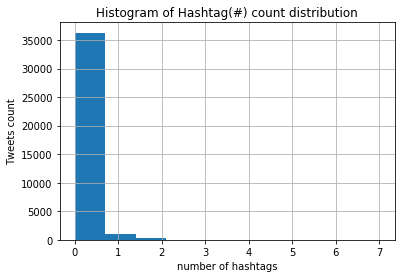

In [55]:
import matplotlib.pyplot as plt
# Function that returns number of hashtags in a string
def count_hashtags(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]
    
    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
tweets['hashtag_count'] = tweets['full_text'].apply(count_hashtags)
tweets['hashtag_count'].hist()
plt.title('Histogram of Hashtag(#) count distribution')
plt.xlabel("number of hashtags")
plt.ylabel("Tweets count")
plt.show()

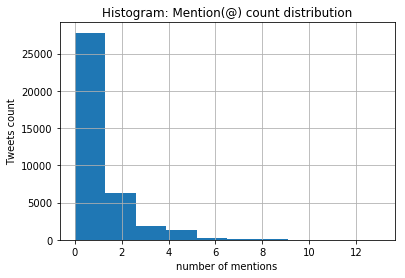

In [56]:
# Function that returns number of mentions in a string
def count_mentions(string):
    # Split the string into words
    words = string.split()
    
    # Create a list of words that are mentions
    mentions = [word for word in words if word.startswith('@')]
    
    # Return number of mentions
    return(len(mentions))

# Create a feature mention_count and display distribution
tweets['mention_count'] = tweets['full_text'].apply(count_mentions)
tweets['mention_count'].hist()
plt.title('Histogram: Mention(@) count distribution')
plt.xlabel("number of mentions")
plt.ylabel("Tweets count")
plt.show()

It looks like the number of mentions is more than the number of hashtags in our dataset. Now let's explore how many kinds of languages were retrieved.


In [57]:
#function that returns the count of unique entries in that column.
tweets.Language.value_counts()

'en'     37438
'und'    87   
'ro'     53   
'ca'     48   
'es'     48   
'fr'     25   
'de'     5    
'tl'     5    
'nl'     3    
'in'     2    
'hi'     2    
'ja'     1    
'zh'     1    
'et'     1    
'sv'     1    
'ht'     1    
Name: Language, dtype: int64

In [58]:
#selecting only English language tweets after removing quotes ('')
tweets["Language"]= tweets["Language"].str.replace("'", "", case = False) 
tweets = tweets.loc[tweets['Language'] == 'en']
#function that returns the count of unique entries in that column to check if only english language tweets were selected
tweets.Language.value_counts()


en    37438
Name: Language, dtype: int64

Now let's explore twitter data sources used by Twitter users:

In [59]:
## Let's explore the tweet sources by obtaining all possible sources:
tweets['Tweet Source'].value_counts()

'Twitter for iPhone'                                                                                              14425
'Twitter for Android'                                                                                             9611 
'Twitter Web App'                                                                                                 9097 
'Twitter for iPad'                                                                                                2461 
'Twitter Web Client'                                                                                              689  
'TweetDeck'                                                                                                       340  
'Facebook'                                                                                                        184  
'Tweetbot for i\xce\x9fS'                                                                                         175  
'Twitterrific for iOS'                  


Based on the output, we realize that basically this twitter dataset has five sources:

Twitter for iPhone, Twitter for Android, Twitter Web App, Twitter for ipad, Media Studio. Now, let's define a function and visualize sources used by twitter users:

In [60]:
#strip "'" from column name
tweets['Tweet Source'] = tweets['Tweet Source'].str.replace("'", "", case = False)

In [61]:
#function to aggregate top  sources
def source(x):
    if x=="Twitter for iPhone":
        return "Twitter for iPhone"

    elif x=='Twitter for Android':
        return 'Twitter for Android'
    
    elif  x == 'Twitter for iPad':
        return 'Twitter for iPad'
    
    elif x == 'Twitter Web App':
        return 'Twitter Web App'
    
    
    else:
        return "Media Studio"
tweets['Tweet Source'] = tweets['Tweet Source'].apply(source)


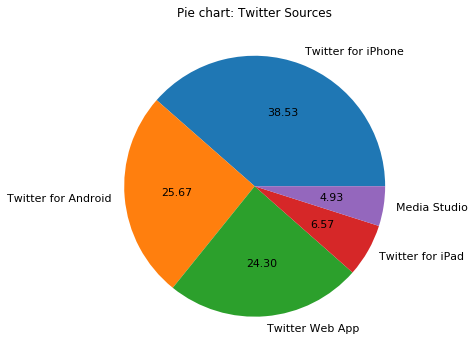

In [62]:
# Pie chart to visualize twitter sources:
pie_chart = pd.Series(tweets['Tweet Source'].value_counts())
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));
plt.title("Pie chart: Twitter Sources");
plt.ylabel("");


In [63]:
# Show duplicated tweets if exist
len(tweets[tweets.duplicated('full_text')])

22550

In [64]:
tweets.shape

(37438, 19)

__Data Preprocessing:__
    
Pre-processing is the next step in text classification, and choosing right pre-processing techniques can improve classification effectiveness. With the basic  data cleaning task done, we will now define function which can be applied to the whole dataset to extract clean text which can be used to build our target variable. Then we will apply an extensive set of pre-processing steps to decrease the size of the feature set to make it suitable for learning algorithms.

In [65]:
# defining a function  to remove patterns that can be applied to the whole dataset
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt



In [66]:
#Adding a new column "clean text" by removing mention ‘@names’
tweets['clean_text'] = np.vectorize(remove_pattern)(tweets['full_text'], "@[\w]*")

"""Replace Links ((http | https))  in the text are of no use because they don’t convey any useful information"""

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)
tweets['clean_text'] = tweets['clean_text'].apply(remove_URL)
# remove special characters, numbers, punctuations
tweets['clean_text'] = tweets['clean_text'].str.replace("[^a-zA-Z#]", " ")

#replace username-tags
#tweets['clean_text'] = tweets['clean_text'].str.replace('@[A-Z0-9a-z_:]+', " ")


#Select only the words that has 2 characters or more
tweets['clean_text'] = tweets['clean_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>=2]))

In [67]:
print("Raw text:")
print(tweets["Tweet Text"].iloc[1])
print("\n")
print("Clean Text:")
tweets["clean_text"].iloc[1]

Raw text:
'@verrierf @TMZ We did vote, if you recall Hillary won the popular vote by over 3 million votes.  https://t.co/n7UDt1FuYz'


Clean Text:


'We did vote if you recall Hillary won the popular vote by over million votes'

Dropping duplicate rows: 
    
We may have duplicate tweets in our data-frame, it needs to be taken care of. Let us now check if we have duplicates in tweets which is common because of the RT (Retweets):

In [68]:
tweets.drop_duplicates(subset=['clean_text'], keep = 'first',inplace= True)

In [69]:
tweets.shape

(13915, 20)

In [70]:
tweets.columns

Index(['User_Id', 'Total Tweets', 'Favourites_Count', 'Followers',
       'User_Verified', 'User Location', 'Date of Tweet', 'Tweet Id',
       'Tweet Text', 'Language', 'Tweet Source', 'Tweet Retweet',
       'Tweet Reply To Id', 'full_text', 'character_length', 'year',
       'Tweet_emot', 'hashtag_count', 'mention_count', 'clean_text'],
      dtype='object')

In [71]:
tweets.drop(['User_Id', 'Total Tweets', 'Favourites_Count', 'Followers','User_Verified', 'User Location', 'Tweet Id',
             'Tweet Text', 'Language', 'Tweet Source', 'Tweet Retweet','Tweet Reply To Id', 'full_text', 'character_length',
             'Tweet_emot', 'hashtag_count', 'mention_count'], axis=1, inplace = True)

In [72]:
df2 = tweets.copy()

In [73]:
df2.head()

,Date of Tweet,year,clean_text
0,2013-08-09 18:06:33,2013,Worked with Lila and Nate today at BGHS Online Lab Great conversations regarding Electoral College and life after high
1,2010-09-02 06:23:41,2010,We did vote if you recall Hillary won the popular vote by over million votes
5,2010-03-19 20:44:09,2010,Remember Impeachment is just as much pa of the Constitution as the Electoral College is You can republic not de
8,2017-01-14 18:40:51,2017,Funny how Republicans like Nikki Haley suddenly have all this energy for letting the people decide Trump fate when
9,2007-06-25 13:17:17,2007,Is this the Electoral College vote


In [74]:
# exporting clean_text column and year as csv file
#df2.to_csv("@tweets13.csv", index = False)

In [5]:
# load the labelled csv file as pandas df
df3 = pd.read_csv("@tweets_final.csv")
print(df3.shape)
df3.head(2)

(13914, 5)


,Date of Tweet,year,clean_text,sentiment,sentiment_val
0,2013-08-09 18:06:33,2013,Worked with Lila and Nate today at BGHS Online Lab Great conversations regarding Electoral College and life after high,Negative,-1
1,2010-09-02 06:23:41,2010,We did vote if you recall Hillary won the popular vote by over million votes,Negative,-1


In [6]:
#remove stop words and create a new column "token_filtered"
df3['token_filtered'] = df3['clean_text'].apply(lambda x: x.lower())
#print(len(stop_words))
new_stopwords = ['could','much' ,'quite','hers', 'between','go','arnt','This','the','When','we','It','many','we','n','f','but', 'The','again','cou', 'there', 'votes', 'about','once','gio','n','n f',' n','  n' ,'n ','f','during', 'out', 'very', 'having', 'with','they', 'own', 'an', 'be', 'some', 'for', 'do', 'its',  'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don','nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above',  'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and',    'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why',                               'so', 'can', 'did',  'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only',  'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my','a',  'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than']
stop_words.update(new_stopwords)
df3['token_filtered'] = df3['clean_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
#print(len(stop_words))
#Now, let's focus on Tokenization and lemmatization:
# Import the necessary modules
from nltk.tokenize  import regexp_tokenize
from nltk.tokenize  import  TweetTokenizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

# tokenize helper function
def pre_processing(tweets):
    
    lower_tokens = [w for w in word_tokenize(tweets.lower())]
    # Retain alphabetic words: alpha_only
    alpha_only = [t for t in lower_tokens if t.isalpha()]

    # Remove all stop words: no_stops
    no_stops = [t for t in alpha_only if t not in stop_words]
    
    pstemmer = PorterStemmer()
    stemmed = [pstemmer.stem(word) for word in no_stops]

    # Instantiate the WordNetLemmatizer
    wordnet_lemmatizer = WordNetLemmatizer()

         # Lemmatize all tokens into a new list: lemmatized
        #and # Detokenize cleaned dataframe for vectorizing
    lemmatized = ' '.join([wordnet_lemmatizer.lemmatize(t) for t in stemmed ])
    
    
    
    return lemmatized
# Apply the extraction to the token_filtered column
df3["processed_text"] = df3["token_filtered"].apply(pre_processing)
    
df3[['clean_text','token_filtered',"processed_text"]][10:12]


,clean_text,token_filtered,processed_text
10,Gio The great Electoral College of America the Beautiful disagrees with you onesided assumption,Gio great Electoral College America Beautiful disagrees onesided assumption,great elector colleg america beauti disagre onesid assumpt
11,Agree Their proposal in congress to reform elections would legalize all their fraud Staing with ballot,Agree Their proposal congress reform elections would legalize fraud Staing ballot,agre propos congress reform elect would legal fraud sta ballot


Here, we would like to illustrate most commonly used words:

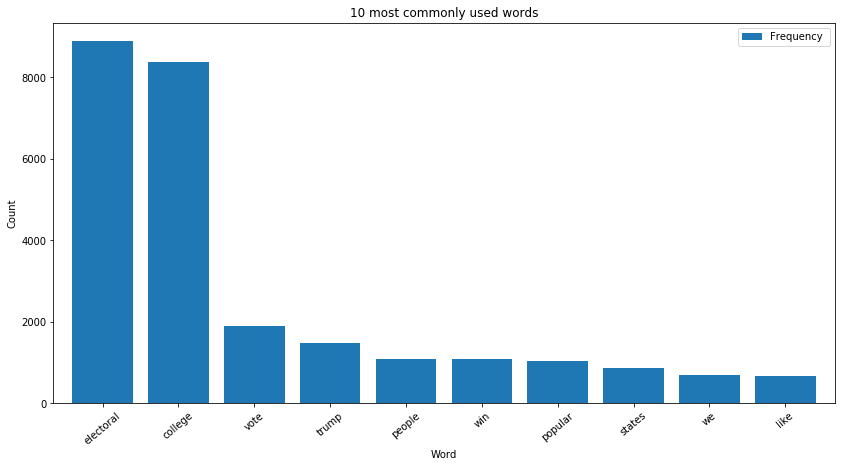

In [7]:
from collections import Counter


# generate DF out of Counter

words = (df3.token_filtered.str.lower().str.cat(sep=' ').split())
result = pd.DataFrame(Counter(words).most_common(10),
                    columns=['Word', 'Frequency ']).set_index('Word')
#BAR CHART
result.plot.bar(rot=40, figsize=(14,7), width=0.8,colormap='tab10');
plt.title("10 most commonly used words")
plt.ylabel("Count");

Analyzing the results:

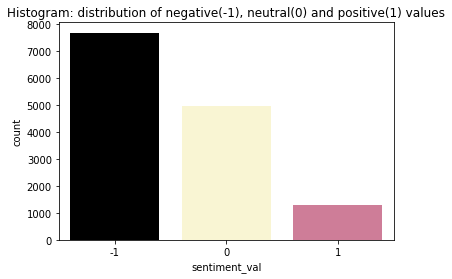

In [58]:
sns.countplot(sentiment, data = df3, palette =["black","lemonchiffon","palevioletred"])
plt.title("Histogram: distribution of negative(-1), neutral(0) and positive(1) values");



__Word Cloud visualization:__ 

A word cloud represents word usage in a document by resizing individual words proportionally to its frequency and then presenting them in a random arrangement. The textual analysis  of our tweets provides a general idea of what kind of words are frequent in our corpus. 
 
The word clouds give greater prominence to words that appear more frequently in the source text. Create and generate word cloud image of the tweets having positive sentiment, neutral sentiment and negative sentiment as below:

In [9]:
# Import the word cloud function and stop words list
from wordcloud import WordCloud, STOPWORDS 

import matplotlib.pyplot as plt

# GENERATE POSITIVE TEXT,NEGATIVE TEXT,NEUTRAL TEXT 
positive_text=""
negative_text=""
neutral_text=""

for i in range(len(df3.index)):
    if(df3.loc[i]["sentiment_val"]==1):
        positive_text+=df3.loc[i]["token_filtered"]
    elif(df3.loc[i]["sentiment_val"]==-1):
        negative_text+=df3.loc[i]["token_filtered"]
    else:
        neutral_text+=df3.loc[i]["token_filtered"]

list_text = [positive_text,negative_text,neutral_text]


# Define the list of stopwords
my_stop_words = STOPWORDS.update(['electoral college','electoral','college', 'how', 'further', 'vote','trump','president','was', 'winning','here','state','people','elected', 'https','co''data','than','give','sake','step','signed','millions'])




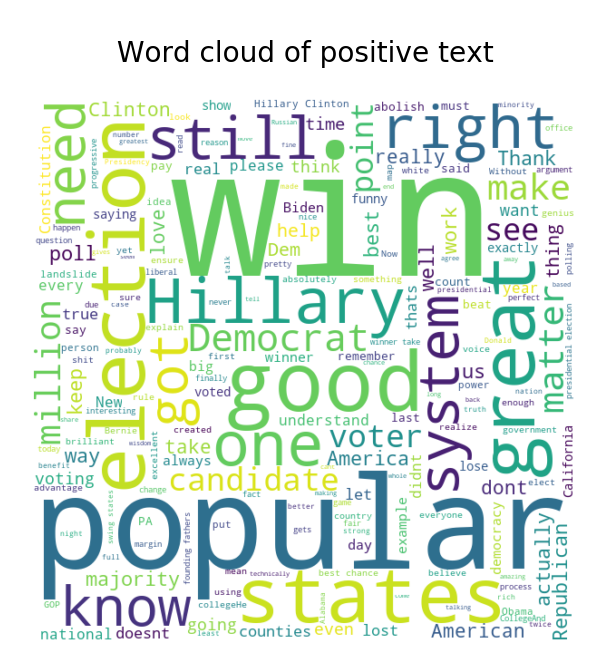

In [10]:
word_cloud = WordCloud(width = 600,height = 600,background_color='white',stopwords=my_stop_words).generate(positive_text)
plt.figure(figsize=(12,10))# create a new figure
plt.imshow(word_cloud,interpolation="bilinear")
plt.title(" \n Word cloud of positive text \n " ,fontsize = 28)
plt.axis("off")
plt.show()

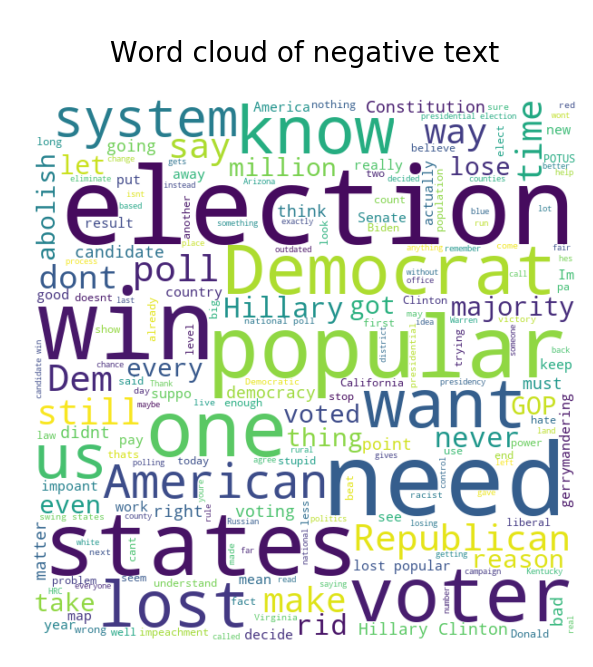

In [11]:
word_cloud = WordCloud(width = 600,height = 600,background_color='white',stopwords=my_stop_words).generate(negative_text)
plt.figure(figsize=(12,10))# create a new figure
plt.imshow(word_cloud,interpolation="bilinear")
plt.title("\n Word cloud of negative text \n",fontsize = 28)
plt.axis("off")
plt.show()

Language mentions over time:

First, let's define a function to check if a word is in a Twitter dataset's text

In [12]:
def check_word_in_tweet(word, data):
    """Checks if a word is in a Twitter dataset's text. 
    
    Returns a logical pandas Series.
    """
    contains_column = data['token_filtered'].str.contains(word, case = False)
    
    return contains_column

# Convert the created_at column to np.datetime object
df3['Date of Tweet'] = pd.to_datetime(df3['Date of Tweet'])


# Set the index of df3 to 'Date of Tweet'
df3 = df3.set_index('Date of Tweet')



In [13]:
# Create a democrat column
df3['democrat'] = check_word_in_tweet('democrat', df3)

# Create republic column
df3['republican'] = check_word_in_tweet('republican', df3)

In [14]:
df3.head(1)

,year,clean_text,sentiment,sentiment_val,token_filtered,processed_text,democrat,republican
Date of Tweet,,,,,,,,
2013-08-09 18:06:33,2013,Worked with Lila and Nate today at BGHS Online Lab Great conversations regarding Electoral College and life after high,Negative,-1,Worked Lila Nate today BGHS Online Lab Great conversations regarding Electoral College life high,work lila nate today bgh onlin lab great convers regard elector colleg life high,False,False


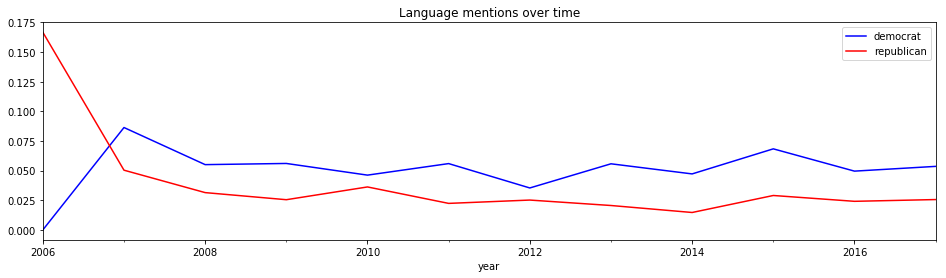

In [16]:

# Average of google column by day
mean_democrat =pd.Series(df3['democrat'].resample('A').mean())

# Average of apple column 
mean_republican = pd.Series(df3['republican'].resample('A').mean())
mean_democrat.plot(figsize=(16,4), label="democrat",color = 'blue',kind = 'line', legend=True);
mean_republican.plot(figsize=(16,4), label="republican", color = 'red',kind = 'line', legend=True);
plt.xlabel("year")
plt.title('Language mentions over time');


As we can see in the plot above, the term “democrat” has been mentioned mostly consistently more number of times compared to the term “replublican”.

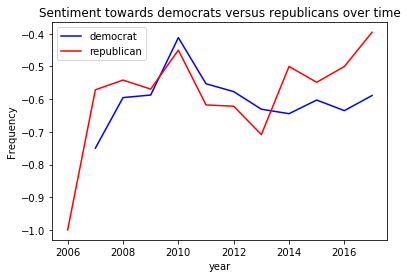

In [21]:
# Generate average sentiment scores for democrat
sentiment_democrat = sentiment[ check_word_in_tweet('democrat', df3) ][0:1000].resample('A').mean()

# Generate average sentiment scores for republican
sentiment_republican = sentiment[ check_word_in_tweet('republican',df3) ][0:1000].resample('A').mean()

# Plot sentiments of democrats/republican by year

plt.plot(sentiment_democrat.index.year, sentiment_democrat, color = 'blue')
plt.plot(sentiment_republican.index.year, sentiment_republican, color ='red' )
# Add labels and show
plt.xlabel('year'); plt.ylabel('Frequency')
plt.title('Sentiment towards democrats versus republicans over time')
plt.legend(('democrat', 'republican'))
plt.show()

 When we compare the opinion trend as seen in the plot below, surprisingly, sentiment toward republicans looks slightly better than democrats just after 2013.


Now, let's analyze the sentiment towards electoral college:

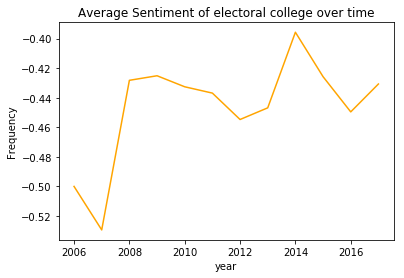

In [64]:

# Generate average sentiment scores for " electoral college "
sentiment = df3["sentiment_val"]
sentiment_ec = sentiment[ check_word_in_tweet('electoral college', df3) ].resample('A').mean()

# Plot sentiments of democrats/republican by year


plt.plot(sentiment_ec.index.year, sentiment_ec, color ='orange' , label = 'electoral college')
# Add labels and show
plt.xlabel('year'); plt.ylabel('Frequency')
plt.title('Average Sentiment of electoral college over time')
#plt.legend(('electoral college'))
plt.show()

We can see from the plot above that the average sentiment towards electoral college has been negative for the large part comparitively, after it peaked in 2014 suggesting it could have been due to 2016 election results. We will now segregate  tweets based on sentiment counts and compare it over the years.

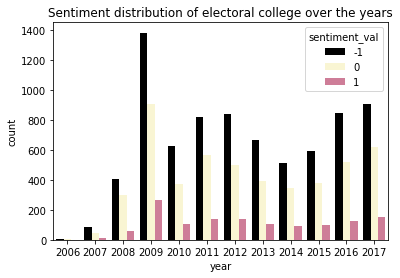

In [65]:
# First bar ploty='democrat',
sns.countplot(data = df3, x = 'year',hue='sentiment_val', palette =["black","lemonchiffon","palevioletred"]);
plt.title("Sentiment distribution of electoral college over the years");

__Inferential Statistics:__

Based on the plot above, we can see that there was a noticeable variations in polarity of average sentiment throughout the years. I would like to to test whether this hypothesis is commensurate with the data, especially from 2014 to 2016.  The dataset has twitter data from  from 2006 to 2018.
The samples derived based on years are independent of each other and are random. I would be perfoming a two sample, two-tailed Z test. I would be also be performing a two sample Bootstrap hypothesis test with null hypothesis being that there is no difference in means with regards to the average sentiment polarity.

Null Hypothesis:

$ Ho \Rightarrow  \mu_{1} = \mu_{2} $ 


Alternate Hypothesis:

$ Ha \Rightarrow  \mu_{1} \neq \mu_{2}  $



In [72]:
#Segregate the data based on the year

sentiment_2014, sentiment_2016 = df3[df3['year']==2014]['sentiment_val'], df3[df3['year']==2016]['sentiment_val']


In [73]:
def diff_of_means(data_1,data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) -  np.mean(data_2)

    return diff
empirical_diff_means = diff_of_means(sentiment_2014, sentiment_2016)
print(f"sentiment_2014 mean : {np.mean(sentiment_2014)}")

print(f"sentiment_2016 mean : {np.mean(sentiment_2016)}")
print(f"Empirical difference of means: {empirical_diff_means}")


sentiment_2014 mean : -0.43756558237145854
sentiment_2016 mean : -0.4795713328868051
Empirical difference of means: 0.04200575051534655


The average sentiment polarity for the year 2014 was -0.44, and that of year 2016 was 0.47 with a difference of 0.042. It is possible this observed difference in mean was by chance. We will compute the probability of getting at least a 0.042 difference in average sentiment polarity under the hypothesis that the average sentiment polarity in both years are identical. Two-sample bootstrap hypothesis test for difference of means:

We now want to test the hypothesis that the year 2014 and 2016 have the same average sentiment polarity with respect to electoral college using the two-sample bootstrap test. Here, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value will be the fraction of replicates with a difference in means greater than or equal to what was observed.

.

In [77]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Concatenate sentiments: sent_concat
sent_concat = np.concatenate((sentiment_2014,sentiment_2016))
# Compute mean of all trips: mean_trips
mean_sentiment = np.mean(sent_concat)

# Generate shifted arrays
sentiment_2014_shifted = sentiment_2014 - np.mean(sentiment_2014) + mean_sentiment
sentiment_2016_shifted = sentiment_2016 - np.mean(sentiment_2016) + mean_sentiment

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_2014 = draw_bs_reps(sentiment_2014_shifted , np.mean,size= 10000)
bs_replicates_2016 = draw_bs_reps(sentiment_2016_shifted , np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_2014 - bs_replicates_2016

# Compute and print p-value: p
p = np.sum(bs_replicates == empirical_diff_means) / len(bs_replicates)

#Confidence Interval(ci)
ci = np.percentile(bs_replicates, [95])

print('p-value :', p)
if p < 0.05:
    print(f"Since p-value is  < 0.05, the difference  is statistically significant and we reject Null Hypothesis with {1 -ci}% confidence")
else:
    print("Accept null hypothesis")

p-value : 0.0
Since p-value is  < 0.05, the difference  is statistically significant and we reject Null Hypothesis with [0.95521387]% confidence


We get a p-value of 0, which suggests that there is a statistically significant difference in the average sentiment polarity from 2014 to 2016. But it is very important to know how different they are! We got a difference of 0.042 between the means. The difference doesn't seem to be that substantial and there might be few situations where sentiment polarity varies.

Since p-value is  < 0.05, the difference  is statistically significant rendering evidence to reject the hypothesis with 95% confidence.

__Future work:__
    
Feature selection

train/test split

Modeling


__Deliverables:__
    
Powerpoint presentation

Python code used for data preprocessing, analysing, modeling in  Github link.

A PDF report on the findings.

 
